In [ ]:
#remove outlier of realSum by percentile technique
#remove outlier of realSum by Zscore
#Remove outlier of realSum by Modified Zscore

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("amsterdam_weekdays.csv")
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [3]:
df.realSum.describe()

count    1103.000000
mean      545.020526
std       416.974314
min       128.887118
25%       309.797764
50%       430.248635
75%       657.324303
max      7782.907225
Name: realSum, dtype: float64

<AxesSubplot:xlabel='realSum', ylabel='Count'>

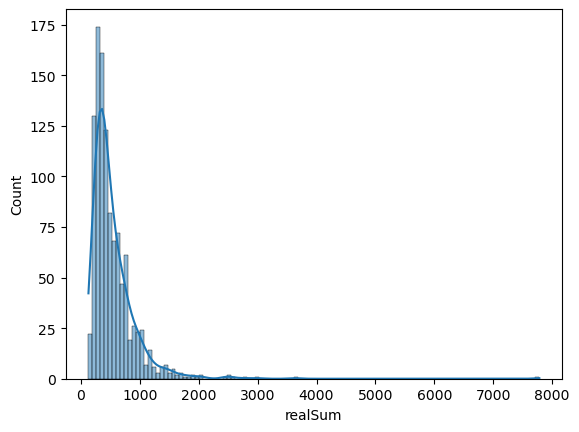

In [11]:
sn.histplot(df.realSum, kde=True)

In [5]:
mean = df.realSum.mean()
mean

545.0205264394511

In [6]:
standard_deviation = df.realSum.std()
standard_deviation

416.97431382908763

In [18]:
#upper outlier and lower outlier
lower_outlier = mean - 2*standard_deviation
upper_outlier = mean + 2*standard_deviation
lower_outlier, upper_outlier

(-288.9281012187241, 1378.9691540976264)

In [25]:
df_lowerlier = df[df.realSum < -288.9281012187241]
df_lowerlier

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat


In [24]:
df_outlier = df[df.realSum > 1378.9691540976264]
df_outlier.shape

(36, 20)

In [35]:
outlier = df[ (df.realSum < -288.9281012187241) | (df.realSum > 1378.9691540976264)]
outlier.shape

(36, 21)

In [27]:
df_no_outlier = df[ (df.realSum > -288.9281012187241) & (df.realSum < 1378.9691540976264)]
df_no_outlier.shape

(1067, 20)

In [29]:
df_no_outlier.realSum.describe()

count    1067.000000
mean      495.137375
std       249.801186
min       128.887118
25%       307.220022
50%       420.406346
75%       632.952921
max      1376.514424
Name: realSum, dtype: float64

<AxesSubplot:xlabel='realSum', ylabel='Count'>

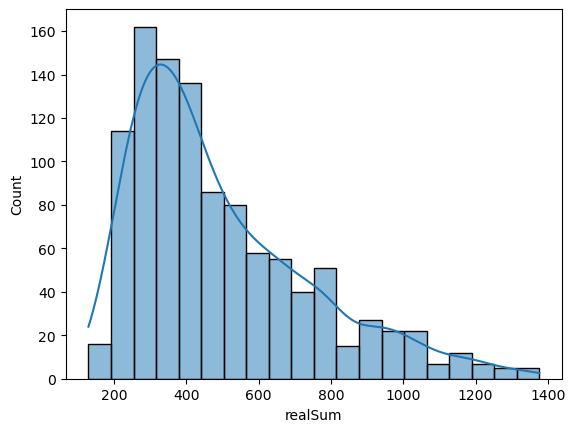

In [30]:
sn.histplot(df_no_outlier.realSum, kde=True)

In [32]:
# First I create a column of zscore
df['zscore'] = (df.realSum - df.realSum.mean()) / df.realSum.std()
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,zscore
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,-0.841747
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,-0.481504
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,-0.673708
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,-0.267381
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,-0.142617


In [34]:
#I can combine it by using or operation
outlier = df[ (df.zscore < -2) | (df.zscore > 2)]
outlier.shape

(36, 21)

In [36]:
#No outlier data I can combine it by using and operation
no_outlier = df[ (df.zscore > -2) & (df.zscore < 2)]
no_outlier.shape

(1067, 21)

In [38]:
_, mean, std, *_ = df.realSum.describe()
mean, std

(545.0205264394511, 416.97431382908763)

In [39]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [40]:
MAD = get_mad(df.realSum)
median = np.median(df.realSum)
MAD, median

(150.21207789468752, 430.24863496824696)

In [41]:
def get_Modified_Z_Score(x, median, MAD):
    return 0.6745*(x-median)/MAD

In [42]:
df["Modified_Z_Score"] = df.realSum.apply(lambda x: get_Modified_Z_Score(x, median, MAD))
df.head(2)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,zscore,Modified_Z_Score
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,-0.841747,-1.06068
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,-0.481504,-0.38618


In [43]:
df[df.Modified_Z_Score > -2]

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,zscore,Modified_Z_Score
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,-0.841747,-1.060680
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,-0.481504,-0.386180
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,-0.673708,-0.746054
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,-0.267381,0.014732
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,-0.142617,0.248334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,...,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677,4.655190,9.231495
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,...,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910,-0.746769,-0.882848
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,...,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798,-0.546696,-0.508243
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,...,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794,3.040560,6.208346


In [45]:
modified_Z_Score = df[df.Modified_Z_Score < 2]
modified_Z_Score.shape

(960, 22)

In [46]:
no_outlier = df[ (df.Modified_Z_Score < -2) | (df.Modified_Z_Score > 2)]
no_outlier.shape

(143, 22)

In [47]:
no_outlier = df[ (df.Modified_Z_Score > -2) & (df.Modified_Z_Score < 2)]
no_outlier.shape

(960, 22)

<AxesSubplot:xlabel='Modified_Z_Score', ylabel='Count'>

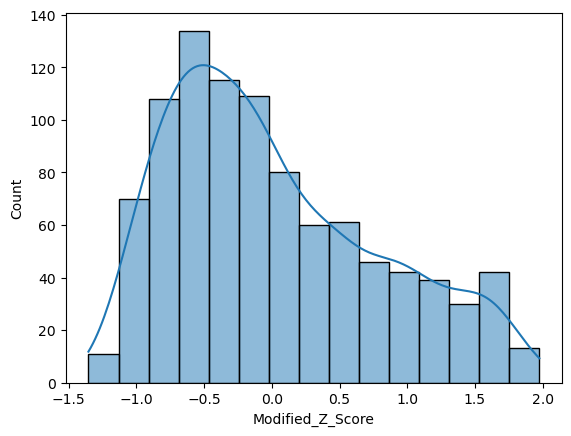

In [50]:
sn.histplot(no_outlier.Modified_Z_Score, kde=True)